# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

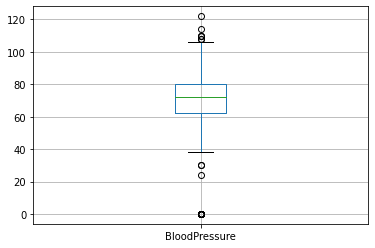

In [6]:
df[["BloodPressure"]].boxplot()

<AxesSubplot:>

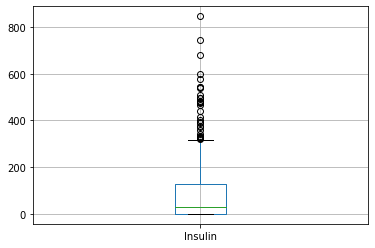

In [7]:
df[["Insulin"]].boxplot()

<AxesSubplot:>

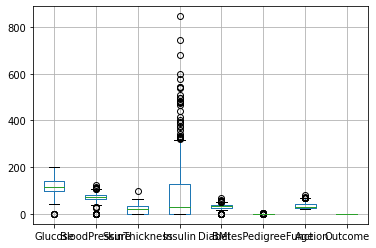

In [8]:
df.boxplot()

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

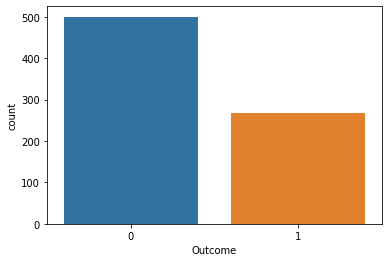

In [10]:
sns.countplot(x = df["Outcome"])

50-50 Ideal balanced
60-40
65-35


80-20  Imbalanced Data
90-10

SMOTE
0 >> 500, 1 >> 268
Oversampling    0 >> 500, 1 >> 500
Undersampling   0 >> 268, 1 >> 268

In [11]:
268/(268+500)

0.3489583333333333

In [12]:
400/(400+500)

0.4444444444444444

In [13]:
500/(400+500)

0.5555555555555556

In [14]:
100/(100+600)  # Imbalanced

0.14285714285714285

# Train Test Split

In [15]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3, stratify = y)

In [17]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [18]:
408/(500)

0.816

In [19]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [20]:
92/(500)

0.184

# Model Traning

In [21]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

C:\Users\suchita.berde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation

In [22]:
## Testing Data Evaluation

print("**************Testing Data Evaluation *****************")
y_pred_test = log_clf.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test, y_pred_test)
print("Accuaracy Score :", acc_score)

print("*"*70)
clf_report = classification_report(y_test,y_pred_test)
print("Classification Report :\n", clf_report)
print("*"*70)


**************Testing Data Evaluation *****************
**********************************************************************
Confusion Matrix :
 [[89 11]
 [28 26]]
**********************************************************************
Accuaracy Score : 0.7467532467532467
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       100
           1       0.70      0.48      0.57        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154

**********************************************************************


In [23]:
x_test.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
547,131,68,21,166,33.1,0.160,28
240,91,64,24,0,29.2,0.192,21
403,72,78,25,0,31.6,0.280,38
641,128,70,0,0,34.3,0.303,24
733,106,56,27,165,29.0,0.426,22


In [24]:
y_pred_test[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
## Training Data Evaluation

print("**************Training Data Evaluation *****************")
y_pred_train = log_clf.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuaracy Score :", acc_score)

print("*"*70)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)
print("*"*70)


**************Training Data Evaluation *****************
**********************************************************************
Confusion Matrix :
 [[354  46]
 [ 89 125]]
**********************************************************************
Accuaracy Score : 0.7801302931596091
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.73      0.58      0.65       214

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614

**********************************************************************


In [ ]:
Confusion Matrix :
 [[354  46]       TN  FP
 [ 89 125]]       FN  TP

In [ ]:
Recall = TP / (TP + FN)

# AUC_ROC Curve

In [26]:
y_pred_prob_train = log_clf.predict_proba(x_train)
y_pred_prob_train[:10]

array([[0.98922872, 0.01077128],
       [0.89067152, 0.10932848],
       [0.77045985, 0.22954015],
       [0.92454389, 0.07545611],
       [0.80779645, 0.19220355],
       [0.95170637, 0.04829363],
       [0.34019615, 0.65980385],
       [0.32754908, 0.67245092],
       [0.82310713, 0.17689287],
       [0.61334486, 0.38665514]])

p(Y=0) = 0.98    #  P >= 0.5 Class A
                 #  P <0.5   Class B
P(Y=1) = 0.01  

[0.98922872, 0.01077128],  >> Class 0
[0.89067152, 0.10932848],  >> Class 0
[0.77045985, 0.22954015],  >> Class 0
[0.92454389, 0.07545611],  >> Class 0
[0.80779645, 0.19220355]   >> Class 0

y_pred_train[:10]

In [27]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_prob_train[:,1])
tpr_array = np.around(tpr, 3)
tpr_array

array([0.   , 0.005, 0.014, 0.014, 0.042, 0.042, 0.061, 0.061, 0.14 ,
       0.14 , 0.164, 0.164, 0.178, 0.178, 0.215, 0.215, 0.22 , 0.22 ,
       0.271, 0.271, 0.28 , 0.28 , 0.285, 0.285, 0.308, 0.308, 0.313,
       0.313, 0.332, 0.332, 0.341, 0.341, 0.346, 0.346, 0.355, 0.355,
       0.425, 0.425, 0.439, 0.439, 0.491, 0.491, 0.495, 0.495, 0.505,
       0.505, 0.519, 0.519, 0.523, 0.523, 0.528, 0.528, 0.542, 0.542,
       0.547, 0.547, 0.565, 0.565, 0.584, 0.584, 0.607, 0.607, 0.612,
       0.612, 0.617, 0.617, 0.621, 0.621, 0.636, 0.636, 0.64 , 0.64 ,
       0.65 , 0.65 , 0.654, 0.654, 0.659, 0.659, 0.664, 0.664, 0.673,
       0.673, 0.682, 0.682, 0.687, 0.687, 0.692, 0.692, 0.706, 0.706,
       0.71 , 0.71 , 0.729, 0.729, 0.734, 0.734, 0.738, 0.738, 0.743,
       0.743, 0.752, 0.752, 0.762, 0.762, 0.766, 0.766, 0.771, 0.771,
       0.776, 0.776, 0.78 , 0.78 , 0.785, 0.785, 0.79 , 0.79 , 0.794,
       0.794, 0.799, 0.799, 0.808, 0.808, 0.813, 0.813, 0.818, 0.818,
       0.827, 0.827,

In [34]:
fpr_array = np.around(fpr,3)

In [35]:
max(tpr_array - fpr_array)

0.5389999999999999

In [28]:
np.where(tpr_array == 0.916)

(array([158, 159], dtype=int64),)

In [29]:
len(threshold)

192

In [30]:
# np.around(threshold,3)

In [31]:
threshold[158]

0.17802742114950879

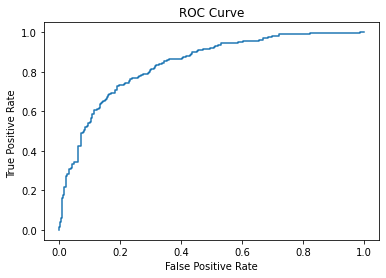

In [32]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve")
plt.savefig("ROC_Curve.png")

In [33]:
roc_auc_score(y_train, y_pred_prob_train[:,1])

0.8389018691588784

In [ ]:
accuracy_score = 0.780
            

Precision = 0.73
Recall = 0.58
F1_score = 0.65

tpr-fpr # optimum threshold value

# Calculating and Setting Threshold to Optimise Logistic Regression Performance 

In [39]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def threshold_from_optimal_trp_minus_fpr(self, X, y):
        y_prob = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr,tpr,thresholds = roc_curve(y, y_prob)
        optimal_id = np.argmax(tpr-fpr)
        
        return thresholds[optimal_id], tpr[optimal_id] - fpr[optimal_id]
    
    def predict(self,X,threshold=None):
        if threshold == None:
            return LogisticRegression.predict(self,X)
        else:
            y_prob = LogisticRegression.predict_proba(self,X)[:,1]
            y_pred_with_threshold = (y_prob >= threshold).astype(int)
            return y_pred_with_threshold

In [38]:
np.argmax([2,3,4,5,6,2,4,5])

4

In [40]:
log_optimal = LogisticRegressionWithThreshold()
log_optimal.fit(x_train, y_train)

C:\Users\suchita.berde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionWithThreshold()

In [42]:
threshold_optimal, optimal_tpr_minus_fpr =log_optimal.threshold_from_optimal_trp_minus_fpr(x_train,y_train)

In [43]:
threshold_optimal

0.3658297981616483

In [44]:
optimal_tpr_minus_fpr

0.5389719626168223

In [45]:
y_pred_threshold = log_optimal.predict(x_train,threshold_optimal)

In [ ]:
Confusion Matrix :
 [[354  46]       TN  FP
 [ 89 125]]       FN  TP

In [48]:
(354 + 125)/ (354 + 125 + 89 + 46)

0.7801302931596091

In [46]:
cnf_matrix_optimal = confusion_matrix(y_train, y_pred_threshold)
cnf_matrix_optimal

array([[324,  76],
       [ 58, 156]], dtype=int64)

In [49]:
(324 + 156)/ (324+156 + 58 + 76)

0.7817589576547231

In [47]:
class_report_optimal = classification_report(y_train, y_pred_threshold)
print(class_report_optimal)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       400
           1       0.67      0.73      0.70       214

    accuracy                           0.78       614
   macro avg       0.76      0.77      0.76       614
weighted avg       0.79      0.78      0.78       614



# Assumptions

In [ ]:
1. No Multicollinearity
2. Lineairty >> Independent vs log odds

In [50]:
P = y_pred_prob_train[:,1]

In [53]:
log_odds = np.log(P/ (1-P))
# log_odds

In [57]:
df_linearity = pd.DataFrame(x_train)
df_linearity["Log_odds"] = log_odds
df_linearity

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Log_odd,Log_odds
145,102,75,23,0,0.0,0.572,21,-4.520042,-4.520042
491,89,90,30,0,33.5,0.292,42,-2.097619,-2.097619
94,142,82,18,64,24.7,0.761,21,-1.210910,-1.210910
514,99,54,19,86,25.6,0.154,24,-2.505749,-2.505749
439,107,88,0,0,36.8,0.727,31,-1.435755,-1.435755
...,...,...,...,...,...,...,...,...,...
421,94,68,18,76,26.0,0.561,21,-2.754039,-2.754039
519,129,90,7,326,19.6,0.582,60,-0.958696,-0.958696
287,119,86,39,220,45.6,0.808,29,-0.099420,-0.099420
400,95,64,0,0,32.0,0.161,31,-2.187813,-2.187813


In [56]:
df_linearity.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Log_odd,Log_odds
Glucose,1.000000,0.181573,0.043171,0.268158,0.213583,0.127076,0.273588,0.878862,0.878862
BloodPressure,0.181573,1.000000,0.163904,0.086593,0.259434,0.042728,0.258560,0.102514,0.102514
SkinThickness,0.043171,0.163904,1.000000,0.435973,0.394139,0.186825,-0.124529,0.189351,0.189351
Insulin,0.268158,0.086593,0.435973,1.000000,0.207586,0.176488,-0.070744,0.283601,0.283601
BMI,0.213583,0.259434,0.394139,0.207586,1.000000,0.148389,0.014461,0.519457,0.519457
DiabetesPedigreeFunction,0.127076,0.042728,0.186825,0.176488,0.148389,1.000000,0.060936,0.308776,0.308776
Age,0.273588,0.258560,-0.124529,-0.070744,0.014461,0.060936,1.000000,0.437817,0.437817
Log_odd,0.878862,0.102514,0.189351,0.283601,0.519457,0.308776,0.437817,1.000000,1.000000
Log_odds,0.878862,0.102514,0.189351,0.283601,0.519457,0.308776,0.437817,1.000000,1.000000
